In [44]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib widget
from efficient_apriori import apriori
from sklearn.cluster import KMeans

In [32]:
df_download = pd.read_csv(r'C:\Users\yg\Downloads\app_downloads.csv')
df_review = pd.read_csv(r'C:\Users\yg\Downloads\reviews.csv',dtype = {'user_id':str, 'driver_id':str, 'ride_id' : str, 'review_id':str, 'rating' : str})
df_ride = pd.read_csv(r'C:\Users\yg\Downloads\ride_requests.csv',dtype = {'driver_id':str,'user_id':str, 'ride_id' : str})
df_sign = pd.read_csv(r'C:\Users\yg\Downloads\signups.csv',dtype = {'user_id':str})
df_tran = pd.read_csv(r'C:\Users\yg\Downloads\transactions.csv',dtype = {'user_id':str, 'driver_id':str, 'ride_id' : str,'transaction_id':str, 'purchase_amount_usd':float})

In [33]:
df_review = df_review.drop(axis = 1, labels = ['user_id','driver_id'])

In [34]:
df_ride.loc[:,'pickup_lon'] = df_ride.loc[:,'pickup_location'].str.split(' ').str[0].astype(float)
df_ride.loc[:,'pickup_lat'] = df_ride.loc[:,'pickup_location'].str.split(' ').str[-1].astype(float)
df_ride.loc[:,'dropoff_lon'] = df_ride.loc[:,'dropoff_location'].str.split(' ').str[0].astype(float)
df_ride.loc[:,'dropoff_lat'] = df_ride.loc[:,'dropoff_location'].str.split(' ').str[-1].astype(float)

In [35]:
df_download_sign = df_download.merge(df_sign, left_on='app_download_key', right_on='session_id', how = 'left')
df_download_sign = df_download_sign.replace({'user_id': {np.nan: 'user did not sign up'},'age_range' : {np.nan:'user age did not sign up'} })
df_download_sign = df_download_sign.drop(axis = 1, labels = ['session_id','signup_ts','download_ts'])

In [36]:
df_download_sign_ride = df_download_sign.merge(df_ride, on = 'user_id', how = 'left')
df_download_sign_ride = df_download_sign_ride.replace({
                                         'ride_id' : {np.nan:'did not have ride'},
                                         'driver_id' : {np.nan:'canceled ride'},
                                         'pickup_lon' : {np.nan:0},
                                         'pickup_lat' : {np.nan:0},
                                         'dropoff_lon' : {np.nan:0},
                                         'dropoff_lat' : {np.nan:0}})
df_download_sign_ride = df_download_sign_ride.drop(axis = 1, labels = ['request_ts','accept_ts','pickup_ts','dropoff_ts','cancel_ts','pickup_location','dropoff_location'])

In [37]:
df_download_sign_ride_tran = df_download_sign_ride.merge(df_tran, on = 'ride_id', how = 'left')
df_download_sign_ride_tran = df_download_sign_ride_tran.replace({'transaction_id': {np.nan: 'user canceled transaction'},
                                         'purchase_amount_usd': {np.nan:'user canceled purchase'},
                                         'charge_status': {np.nan:'charge status unknown'}})
df_download_sign_ride_tran = df_download_sign_ride_tran.drop(axis = 1, labels = ['transaction_ts'])

In [38]:
df_download_sign_ride_tran_review = df_download_sign_ride_tran.merge(df_review, on = 'ride_id', how = 'left')
df_download_sign_ride_tran_review = df_download_sign_ride_tran_review.replace({
                                         'review_id' : {np.nan:'review did not be edited'},
                                         'rating': {np.nan:'did not be rated'},
                                        'review' : {np.nan:'review did not be edited'}})

In [39]:
df_download_sign_ride_tran_review.head()

,app_download_key,platform,user_id,age_range,ride_id,driver_id,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat,transaction_id,purchase_amount_usd,charge_status,review_id,rating,review
0,06f49bcc6895f888eba41043f95348ba,android,106328,Unknown,did not have ride,canceled ride,0.000000,0.000000,0.000000,0.000000,user canceled transaction,user canceled purchase,charge status unknown,review did not be edited,did not be rated,review did not be edited
1,60d79d5ac63159a5dffc13e42d87e070,android,user did not sign up,user age did not sign up,did not have ride,canceled ride,0.000000,0.000000,0.000000,0.000000,user canceled transaction,user canceled purchase,charge status unknown,review did not be edited,did not be rated,review did not be edited
2,a3e52e50d379c3da808c4d8864f0d996,android,100497,45-54,3005193,101863,40.817290,-74.146050,40.713818,-74.051277,10003021,13.05,Approved,52088,4,Decent experience with Metrocar. The app was e...
3,a3e52e50d379c3da808c4d8864f0d996,android,100497,45-54,3018578,102362,40.764919,-74.107729,40.771927,-74.015220,10010707,25.1,Approved,57414,1,A complete disaster. The driver canceled the r...
4,a3e52e50d379c3da808c4d8864f0d996,android,100497,45-54,3022109,103914,40.667440,-73.913092,40.669140,-74.037513,10012812,18.38,Approved,58890,1,Unsafe ride with Metrocar. The driver was dist...


In [49]:
kmeans = KMeans(n_clusters=10, random_state=0)
df = df_download_sign_ride_tran_review

df['pickup_lon'] = kmeans.fit_predict(df[['pickup_lon']])

# Map cluster labels to categorical values if needed
# For example, you can map them to strings or other categories
df['pickup_lon_cat'] = df['pickup_lon'].map({
    0: 'pickup_lon_0',
    1: 'pickup_lon_1',
    2: 'pickup_lon_2',
    3: 'pickup_lon_3',
    4: 'pickup_lon_4',
    5: 'pickup_lon_5',
    6: 'pickup_lon_6',
    7: 'pickup_lon_7',
    8: 'pickup_lon_8',
    9:'pickup_lon_9'
})

df['pickup_lat'] = kmeans.fit_predict(df[['pickup_lat']])

# Map cluster labels to categorical values if needed
# For example, you can map them to strings or other categories
df['pickup_lat_cat'] = df['pickup_lat'].map({
    0: 'pickup_lat_0',
    1: 'pickup_lat_1',
    2: 'pickup_lat_2',
    3: 'pickup_lat_3',
    4: 'pickup_lat_4',
    5: 'pickup_lat_5',
    6: 'pickup_lat_6',
    7: 'pickup_lat_7',
    8: 'pickup_lat_8',
    9:'pickup_lat_9'
})
# Display the DataFrame with the new categorical column


df['dropoff_lon'] = kmeans.fit_predict(df[['dropoff_lon']])

# Map cluster labels to categorical values if needed
# For example, you can map them to strings or other categories
df['dropoff_lon_cat'] = df['dropoff_lon'].map({
    0: 'dropoff_lon_0',
    1: 'dropoff_lon_1',
    2: 'dropoff_lon_2',
    3: 'dropoff_lon_3',
    4: 'dropoff_lon_4',
    5: 'dropoff_lon_5',
    6: 'dropoff_lon_6',
    7: 'dropoff_lon_7',
    8: 'dropoff_lon_8',
    9:'dropoff_lon_9'
})

df['dropoff_lat'] = kmeans.fit_predict(df[['dropoff_lat']])

# Map cluster labels to categorical values if needed
# For example, you can map them to strings or other categories
df['dropoff_lat_cat'] = df['dropoff_lat'].map({
    0: 'dropoff_lat_0',
    1: 'dropoff_lat_1',
    2: 'dropoff_lat_2',
    3: 'dropoff_lat_3',
    4: 'dropoff_lat_4',
    5: 'dropoff_lat_5',
    6: 'dropoff_lat_6',
    7: 'dropoff_lat_7',
    8: 'dropoff_lat_8',
    9:'dropoff_lat_9'
})

C:\Users\yg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yg\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\yg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

In [51]:
df = df.drop(axis = 1, labels = ['pickup_lon','pickup_lat','dropoff_lon','dropoff_lat'])

In [52]:
data = []
for i in df.values:
    data.append(tuple(i))

In [53]:
data[:1]

[('06f49bcc6895f888eba41043f95348ba',
  'android',
  '106328',
  'Unknown',
  'did not have ride',
  'canceled ride',
  'user canceled transaction',
  'user canceled purchase',
  'charge status unknown',
  'review did not be edited',
  'did not be rated',
  'review did not be edited',
  'pickup_lon_6',
  'pickup_lat_1',
  'dropoff_lon_1',
  'dropoff_lat_1')]

In [54]:
itemsets, rules = apriori(data, min_support=0.1, min_confidence=0.3)

In [55]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)  # Prints the rule and its confidence, support, lift, ...

{35-44, ios} -> {did not be rated} (conf: 0.589, supp: 0.103, lift: 0.972, conv: 0.959)
{35-44, ios} -> {review did not be edited} (conf: 0.589, supp: 0.103, lift: 0.972, conv: 0.959)
{35-44, did not be rated} -> {ios} (conf: 0.604, supp: 0.103, lift: 0.992, conv: 0.987)
{35-44, review did not be edited} -> {ios} (conf: 0.604, supp: 0.103, lift: 0.992, conv: 0.987)
{did not be rated, review did not be edited} -> {ios} (conf: 0.607, supp: 0.368, lift: 0.998, conv: 0.996)
{charge status unknown, did not be rated} -> {ios} (conf: 0.609, supp: 0.265, lift: 1.000, conv: 1.000)
{charge status unknown, review did not be edited} -> {ios} (conf: 0.609, supp: 0.265, lift: 1.000, conv: 1.000)
{charge status unknown, user canceled purchase} -> {ios} (conf: 0.609, supp: 0.265, lift: 1.000, conv: 1.000)
{charge status unknown, user canceled transaction} -> {ios} (conf: 0.609, supp: 0.265, lift: 1.000, conv: 1.000)
{did not be rated, user canceled purchase} -> {ios} (conf: 0.609, supp: 0.265, lift: 1

<Axes: xlabel='pickup_lon', ylabel='pickup_lat'>

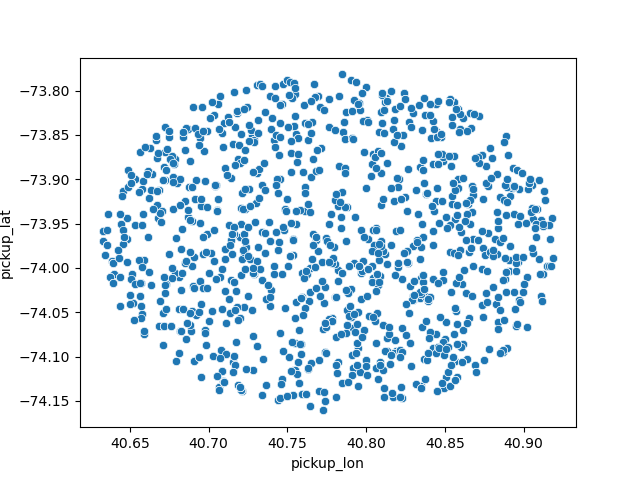

In [28]:
fig = plt.figure()
sns.scatterplot(data=df_download_sign_ride_tran_ride, x="pickup_lon", y="pickup_lat")

<Axes: xlabel='dropoff_lon', ylabel='dropoff_lat'>

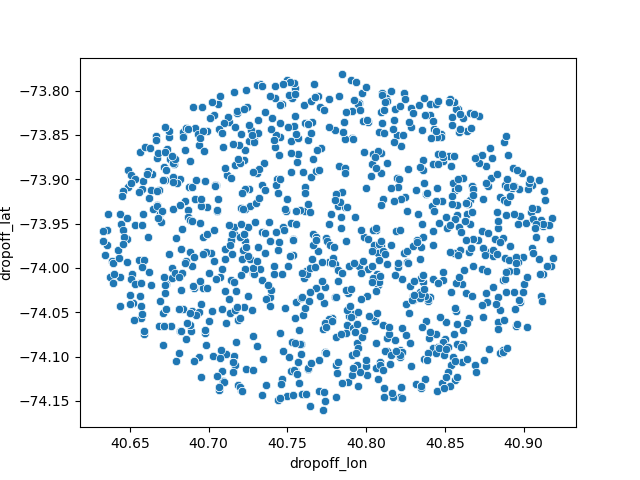

In [29]:
fig2 = plt.figure()
sns.scatterplot(data=df_download_sign_ride_tran_ride, x="dropoff_lon", y="dropoff_lat")